In [56]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
# function to generate noise waves
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

In [6]:
# generate and standar
np.random.seed(4)
X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=False)

# PCA as Autoencoder

In [2]:
# make an autoencoder that does the same as PCA
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3]),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])  # the number of inputs is the same as the outputs in the encoder
])

autoencoder = keras.models.Sequential([
    encoder, decoder
])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-01 11:20:29.566055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 11:20:29.566524: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20


2023-03-01 12:18:33.568283: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-01 12:18:33.719546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 35ms/step - loss: 0.4323
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3688
Epoch 3/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3215
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2900
Epoch 5/20
2/2 [==============================] - 0s 12ms/step - loss: 0.2650
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2436
Epoch 7/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2257
Epoch 8/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2090
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1929
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1780
Epoch 11/20
2/2 [==============================] - 0s 11ms/step - loss: 0.1630
Epoch 12/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1493
Epoch 13/20
2/2 [==============================] - 0s 8ms/step - loss: 0.1351
Epo

In [8]:
codings = encoder.predict(X_train)  # apply PCA

2/2 [==============================] - 0s 8ms/step


2023-03-01 12:18:48.906849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
X_train.shape

(60, 3)

In [11]:
codings.shape

(60, 2)

# Stacked Encoder

In [15]:
# load Fashion MNIST and split into training and validation
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [16]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = stacked_ae.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10


2023-03-01 12:31:53.496060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.3345

2023-03-01 12:32:14.360209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 22s 12ms/step - loss: 0.3345 - val_loss: 0.3120
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3044 - val_loss: 0.3026
Epoch 3/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2977 - val_loss: 0.2961
Epoch 4/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2933 - val_loss: 0.2954
Epoch 5/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2902 - val_loss: 0.2940
Epoch 6/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2882 - val_loss: 0.2898
Epoch 7/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2866 - val_loss: 0.2872
Epoch 8/10
1719/1719 [==============================] - 23s 13ms/step - loss: 0.2854 - val_loss: 0.2860
Epoch 9/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2845 - val_loss: 0.2852
Epoch 10/10
1719/1719 [==============================] - 22s 13ms/step - lo

1/1 [==============================] - 0s 155ms/step


2023-03-01 12:36:46.361413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


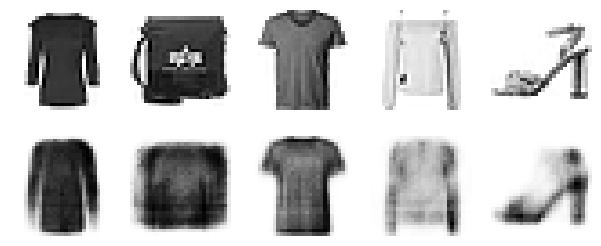

In [17]:
# reconstruct the fashion MNIST dataset and compare with the original images
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

 56/157 [=========>....................] - ETA: 0s

2023-03-01 12:46:05.371609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 0s 3ms/step


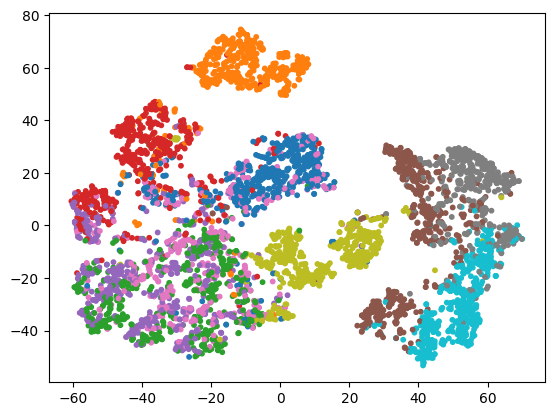

In [18]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)

plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")


# Tie Weights

In [23]:
# define a layer whose weights are the transposed weights of an input layer
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs) -> None:
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros", shape=[self.dense.input_shape[-1]])
        super().build(batch_input_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [24]:
# define the same model as above, but tying the weights
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1, 
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

In [25]:
tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5))

history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=[X_valid, X_valid])


Epoch 1/10


2023-03-01 13:14:14.724859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.3277

2023-03-01 13:14:34.273205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 21s 12ms/step - loss: 0.3277 - val_loss: 0.3030
Epoch 2/10
1719/1719 [==============================] - 20s 11ms/step - loss: 0.2980 - val_loss: 0.2957
Epoch 3/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2921 - val_loss: 0.2905
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2888 - val_loss: 0.2886
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2866 - val_loss: 0.2876
Epoch 6/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2852 - val_loss: 0.2883
Epoch 7/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2841 - val_loss: 0.2858
Epoch 8/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2833 - val_loss: 0.2842
Epoch 9/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2827 - val_loss: 0.2862
Epoch 10/10
1719/1719 [==============================] - 19s 11ms/step - lo

# Convolutional Autoencoder

In [ ]:
# build a convolutional autoencoder
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu", input_shape=[3, 3, 64])
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

# Recurrent Autoencoder

In [27]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[None, 28]),
    keras.layers.LSTM(30)
])

recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),  # ensures that its input vector gets fed to the decoder at each time step
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])

recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

# Denoising Autoencoders

In [28]:
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

# Sparse Autoencoders

In [29]:
# sparse autoencoder with l1 regularization
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-1)
])

sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])

In [30]:
# sparse autoencoder with KL divergence

# KL regularizer
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1) -> None:
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (kl_divergence(self.target, mean_activities) + kl_divergence(1 - self.target, 1 - mean_activities))

In [31]:
# sparse autoencoder with KL Divergence regularization
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])

# Variational Autoencoder

In [32]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        # very intricate way of sampling a normal distribution with mean "mean" and standard deviation "std=e^{log_var / 2}"
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean  

In [33]:
# variational encoder
codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)  # mu
codings_log_var = keras.layers.Dense(codings_size)(z)  # gamma
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [34]:
# variational decoder
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)

variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [35]:
# variational autoencoder
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])

In [36]:
# add latent loss to the variational autoencoder
latent_loss = -0.5 * K.sum(1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean), axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)  # 784 so it has the same scale as the reconstruction loss
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [38]:
# fit the model
history = variational_ae.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_valid, X_valid])

Epoch 1/10
430/430 [==============================] - 10s 24ms/step - loss: 0.3328 - val_loss: 0.3291
Epoch 2/10
430/430 [==============================] - 11s 25ms/step - loss: 0.3277 - val_loss: 0.3302
Epoch 3/10
430/430 [==============================] - 11s 25ms/step - loss: 0.3247 - val_loss: 0.3241
Epoch 4/10
430/430 [==============================] - 12s 27ms/step - loss: 0.3224 - val_loss: 0.3271
Epoch 5/10
430/430 [==============================] - 12s 28ms/step - loss: 0.3207 - val_loss: 0.3225
Epoch 6/10
430/430 [==============================] - 11s 25ms/step - loss: 0.3194 - val_loss: 0.3234
Epoch 7/10
430/430 [==============================] - 11s 26ms/step - loss: 0.3183 - val_loss: 0.3193
Epoch 8/10
430/430 [==============================] - 10s 24ms/step - loss: 0.3175 - val_loss: 0.3179
Epoch 9/10
430/430 [==============================] - 10s 23ms/step - loss: 0.3167 - val_loss: 0.3192
Epoch 10/10
430/430 [==============================] - 10s 22ms/step - loss: 0.316

In [39]:
# generate fashion MNIST images
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()

In [41]:
images.shape

(12, 28, 28)

In [42]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")


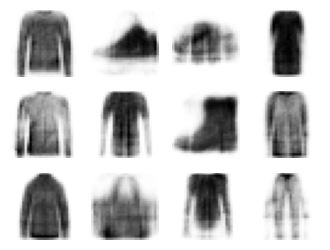

In [44]:
plot_multiple_images(images, 4)  # show new pieces of clothing

## Semantic Interpolation

In [45]:
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

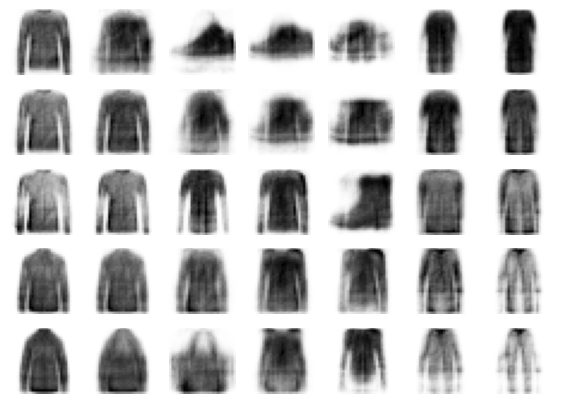

In [47]:
plot_multiple_images(images, 7)  # show new pieces of clothing


# GANs

In [48]:
# make a GAN model
codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

In [51]:
# compile in a specific order
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
# because this line is after compiling the discriminator, the discriminator alone can be trained. It cannot be trained when trianing the GAN
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [49]:
# prepare training set
batch_size = 32 
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size=batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=10):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"{epoch}\r")
        for X_batch in dataset:
            # phase 1 - train the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True  # only to get rid of warnings
            discriminator.train_on_batch(X_fake_and_real, y1)

            # phase 2 - train the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False  # only to get rid of warnings
            gan.train_on_batch(noise, y2)

train_gan(gan, dataset=dataset, batch_size=batch_size, codings_size=codings_size)

# DCGANs

In [58]:
# build a generic DCGAN
codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME", activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME", activation="tanh")
])

discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME", activation=keras.layers.LeakyReLU(0.2), input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME", activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

In [59]:
# make the pixel intesity go from -1 to 1, that is the same scale as the generator (tanh function)
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1  # reshape and rescale